<a href="https://www.kaggle.com/code/sonawanelalitsunil/gold-price-prediction-ml-99-1?scriptVersionId=221067620" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-and-relevant-metrics/Gold Price Prediction.csv


# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Gold Price Prediction </p>

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import libraries</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/gold-price-and-relevant-metrics/Gold Price Prediction.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    676 non-null    object 
 1   Price 2 Days Prior                      676 non-null    float64
 2   Price 1 Day Prior                       676 non-null    float64
 3   Price Today                             676 non-null    float64
 4   Price Tomorrow                          675 non-null    float64
 5   Price Change Tomorrow                   675 non-null    float64
 6   Price Change Ten                        666 non-null    float64
 7   Std Dev 10                              667 non-null    float64
 8   Twenty Moving Average                   676 non-null    float64
 9   Fifty Day Moving Average                676 non-null    float64
 10  200 Day Moving Average                  676 non-null    float6

In [5]:
data.describe()

,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,200 Day Moving Average,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
count,676.000000,676.000000,676.000000,675.000000,675.000000,666.000000,667.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,1956.236228,1957.114305,1957.937944,1958.165600,0.861570,8.944414,20.995813,1924.073017,1871.380976,1622.592107,5.410355,3.680621,94.670118,3.892293,3.977944,3.648092,103.845251,4419.902308,19.881361,84.382929
std,192.959980,193.560530,194.198338,194.252056,17.531773,55.681937,10.470747,265.468530,345.304237,540.444267,2.248175,2.000887,15.576974,1.996601,1.074036,0.766838,3.444444,499.216045,6.054484,11.856576
min,1627.040000,1627.040000,1627.040000,1627.040000,-81.890000,-124.290000,5.587177,90.213500,36.085400,9.021350,3.000000,0.080000,41.000000,0.020000,0.770000,1.630000,94.870000,3520.370000,11.530000,66.620000
25%,1823.587500,1824.490000,1824.490000,1824.880000,-9.100000,-29.540000,13.668920,1827.777875,1798.103600,1567.168475,3.200000,2.330000,83.000000,2.367500,3.400000,3.267500,102.297500,4025.432500,14.235000,76.555000
50%,1930.910000,1931.405000,1931.515000,1931.590000,0.660000,2.870000,18.307964,1927.932750,1919.624800,1814.988850,4.900000,4.830000,95.000000,4.700000,4.360000,3.810000,103.990000,4343.605000,19.070000,81.025000
75%,2021.452500,2022.290000,2023.977500,2024.075000,10.870000,42.332500,25.866758,2010.718500,1993.311900,1954.031825,7.900000,5.330000,104.000000,5.510000,4.730000,4.230000,105.390000,4715.932500,24.050000,88.765000
max,2469.650000,2469.650000,2469.650000,2469.650000,66.660000,186.170000,62.183588,2414.745000,2368.294800,2189.807800,9.100000,5.330000,144.000000,6.020000,5.190000,4.980000,114.190000,5644.090000,37.500000,124.660000


In [6]:
data.head()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
0,8/7/24,2405.87,2384.90,2385.83,NaN,NaN,NaN,30.155078,2414.7450,2368.2948,...,3.0,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,8/6/24,2442.74,2405.87,2384.90,2385.83,0.93,NaN,29.423936,2414.1525,2367.7916,...,3.0,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,8/5/24,2447.17,2442.74,2405.87,2384.90,-20.97,NaN,28.341301,2413.2305,2367.1584,...,3.0,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,8/2/24,2447.23,2447.17,2442.74,2405.87,-36.87,NaN,28.616661,2411.0920,2365.7250,...,3.0,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,8/1/24,2411.09,2447.23,2447.17,2442.74,-4.43,NaN,26.084796,2408.5670,2363.5624,...,3.0,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59


In [7]:
data.tail()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
671,1/7/22,1810.28,1791.61,1796.41,1801.52,5.11,38.17,NaN,450.8225,180.3290,...,7.5,0.1,71,0.05,0.87,1.76,96.26,4697.66,19.85,79.62
672,1/6/22,1813.88,1810.28,1791.61,1796.41,4.80,47.40,NaN,361.0020,144.4008,...,7.5,0.1,73,0.04,0.88,1.73,96.20,4693.39,20.29,77.24
673,1/5/22,1804.27,1813.88,1810.28,1791.61,-18.67,28.30,NaN,271.4215,108.5686,...,7.5,0.1,74,0.05,0.83,1.71,96.31,4787.99,17.07,77.18
674,1/4/22,1815.73,1804.27,1813.88,1810.28,-3.60,0.45,NaN,180.9075,72.3630,...,7.5,0.1,74,0.06,0.77,1.66,96.19,4804.51,16.57,76.02
675,1/3/22,1804.64,1829.05,1804.27,1813.88,9.61,14.95,NaN,90.2135,36.0854,...,7.5,0.1,74,0.05,0.78,1.63,95.67,4778.14,17.60,75.69


In [8]:
data.dtypes

Date                                       object
Price 2 Days Prior                        float64
Price 1 Day Prior                         float64
Price Today                               float64
Price Tomorrow                            float64
Price Change Tomorrow                     float64
Price Change Ten                          float64
Std Dev 10                                float64
Twenty Moving Average                     float64
Fifty Day Moving Average                  float64
200 Day Moving Average                    float64
Monthly Inflation Rate                    float64
EFFR Rate                                 float64
Volume                                      int64
Treasury Par Yield Month                  float64
Treasury Par Yield Two Year               float64
Treasury Par Yield Curve Rates (10 Yr)    float64
DXY                                       float64
SP Open                                   float64
VIX                                       float64


In [9]:
data.isnull().sum()

Date                                       0
Price 2 Days Prior                         0
Price 1 Day Prior                          0
Price Today                                0
Price Tomorrow                             1
Price Change Tomorrow                      1
Price Change Ten                          10
Std Dev 10                                 9
Twenty Moving Average                      0
Fifty Day Moving Average                   0
200 Day Moving Average                     0
Monthly Inflation Rate                     0
EFFR Rate                                  0
Volume                                     0
Treasury Par Yield Month                   0
Treasury Par Yield Two Year                0
Treasury Par Yield Curve Rates (10 Yr)     0
DXY                                        0
SP Open                                    0
VIX                                        0
Crude                                      0
dtype: int64

In [10]:
data.shape

(676, 21)

In [11]:
data.isnull().sum().sum()

21

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data[['Price Tomorrow', 'Price Change Tomorrow']] = data[['Price Tomorrow', 'Price Change Tomorrow']].fillna(method='ffill')
data.dropna(inplace=True) 

In [13]:
print(data.isnull().sum())

Date                                      0
Price 2 Days Prior                        0
Price 1 Day Prior                         0
Price Today                               0
Price Tomorrow                            0
Price Change Tomorrow                     0
Price Change Ten                          0
Std Dev 10                                0
Twenty Moving Average                     0
Fifty Day Moving Average                  0
200 Day Moving Average                    0
Monthly Inflation Rate                    0
EFFR Rate                                 0
Volume                                    0
Treasury Par Yield Month                  0
Treasury Par Yield Two Year               0
Treasury Par Yield Curve Rates (10 Yr)    0
DXY                                       0
SP Open                                   0
VIX                                       0
Crude                                     0
dtype: int64


In [14]:
print(data.columns)

Index(['Date', 'Price 2 Days Prior', 'Price 1 Day Prior', 'Price Today',
       'Price Tomorrow', 'Price Change Tomorrow', 'Price Change Ten',
       'Std Dev 10', 'Twenty Moving Average', 'Fifty Day Moving Average',
       '200 Day Moving Average', 'Monthly Inflation Rate', 'EFFR Rate',
       'Volume ', 'Treasury Par Yield Month', 'Treasury Par Yield Two Year',
       'Treasury Par Yield Curve Rates (10 Yr)', 'DXY', 'SP Open', 'VIX',
       'Crude'],
      dtype='object')


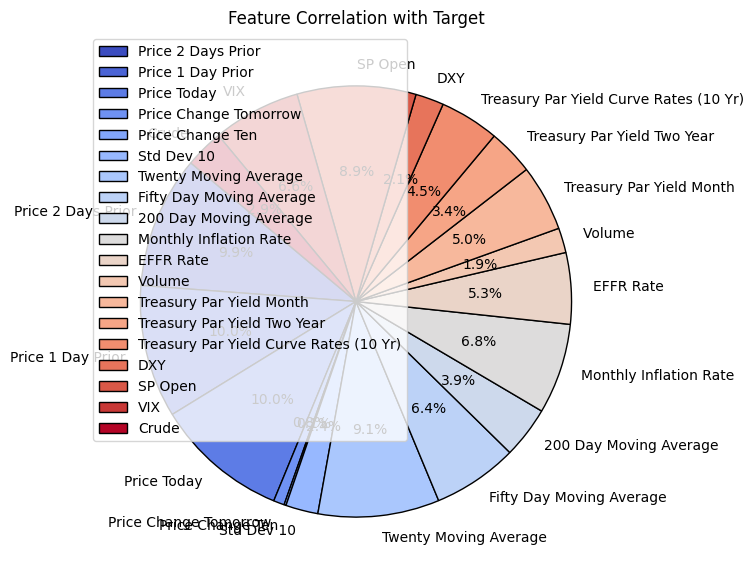

In [15]:
target_col = 'Price Tomorrow'
numeric = data.select_dtypes(include=[np.number])
correlation_values = numeric.corr()['Price Tomorrow'].drop('Price Tomorrow').abs() 
plt.figure(figsize=(7, 7))
correlation_values.plot.pie(autopct='%1.1f%%', startangle=140, cmap='coolwarm', legend=True, wedgeprops={'edgecolor': 'black'})
plt.title('Feature Correlation with Target')
plt.ylabel('') 
plt.show()

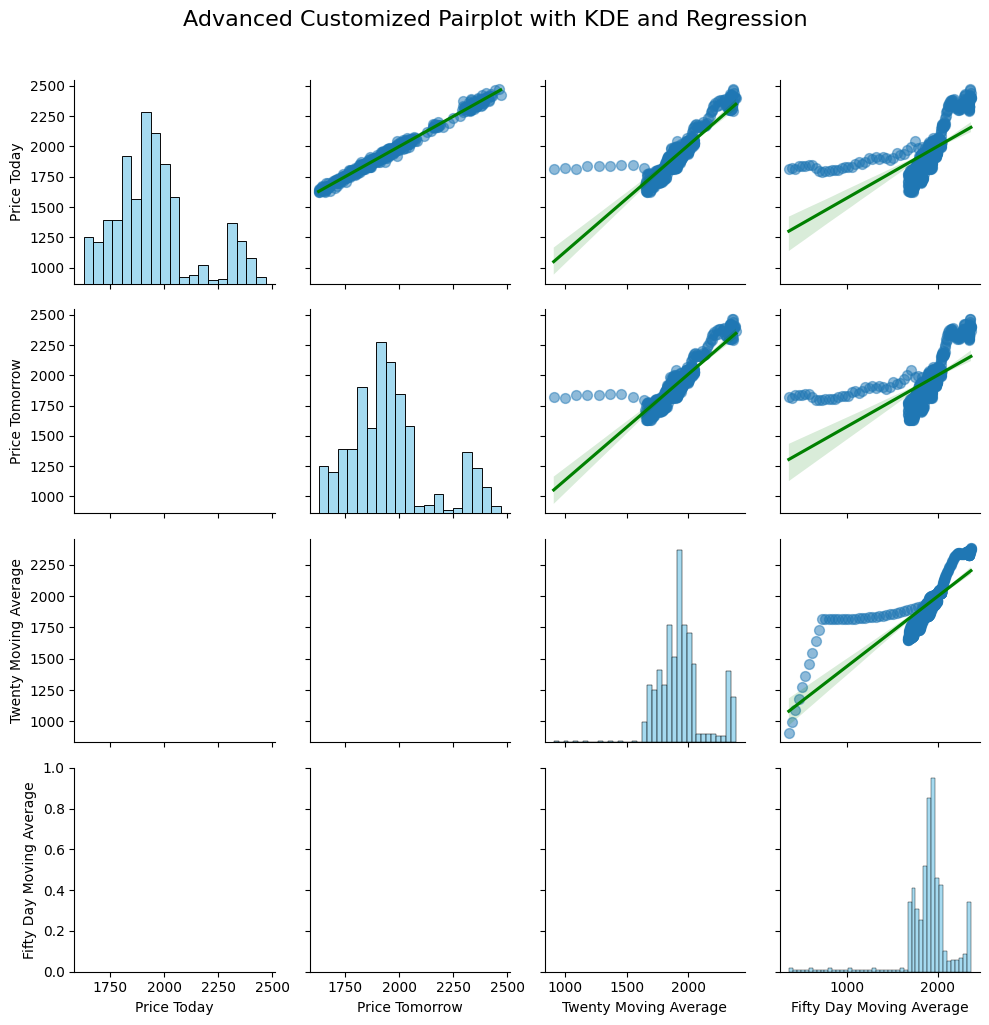

In [16]:
columns = ['Price Today', 'Price Tomorrow', 'Twenty Moving Average', 'Fifty Day Moving Average']
numeric = data[columns]
g = sns.PairGrid(numeric)
g.map_diag(sns.histplot, kde_kws={'color': 'black'}, color='skyblue') 
g.map_upper(sns.regplot, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'green'}) 
plt.suptitle('Advanced Customized Pairplot with KDE and Regression', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Feature Engineering</p>

In [17]:
data['Price Difference'] = data['Price Tomorrow'] - data['Price Today']

In [18]:
data.head()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude,Price Difference
10,2024-07-24,2397.05,2409.86,2400.12,2365.37,-34.75,-14.29,26.120482,2387.0200,2363.0558,...,5.33,86,5.50,4.37,4.28,104.48,5505.84,15.35,77.45,-34.75
11,2024-07-23,2400.95,2397.05,2409.86,2400.12,-9.74,-24.96,29.774000,2383.0825,2362.2280,...,5.33,85,5.49,4.40,4.25,104.31,5565.30,15.21,78.27,-9.74
12,2024-07-22,2442.71,2400.95,2397.05,2409.86,12.81,8.82,34.370081,2379.1965,2360.8238,...,5.33,84,5.49,4.50,4.26,104.37,5544.54,16.79,80.39,12.81
13,2024-07-19,2462.44,2442.71,2400.95,2397.05,-3.90,41.79,37.996575,2375.3835,2360.0924,...,5.33,79,5.48,4.49,4.25,104.16,5543.37,16.44,82.47,-3.90
14,2024-07-18,2469.65,2462.44,2442.71,2400.95,-41.76,4.46,38.405274,2373.4090,2358.9954,...,5.33,83,5.48,4.46,4.20,103.70,5608.56,14.27,83.11,-41.76


# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Data Modellings</p>

In [19]:
X = data[['Price Today', 'Twenty Moving Average', 'Fifty Day Moving Average', 'EFFR Rate', 'DXY']]
y = data['Price Tomorrow']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 340.9038160152399
R-squared: 0.9913234927528204


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')


Mean Squared Error: 415.8125409562931
R-squared: 0.9894169547080864


## KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN model for regression
model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors

# Fit the model to the training data
model_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'Mean Squared Error: {mse_knn}')
print(f'R-squared: {r2_knn}')


Mean Squared Error: 401.70597339393885
R-squared: 0.9897759877547629


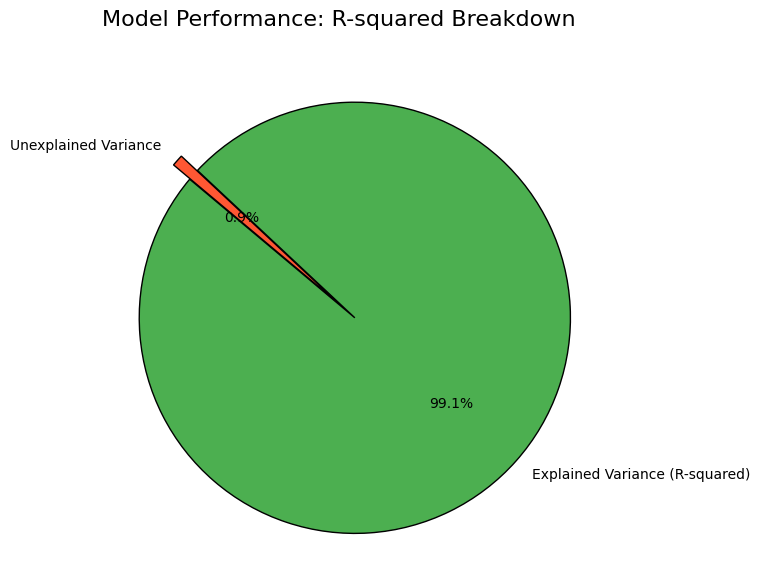

In [27]:
# Pie chart data: (R-squared and error in prediction)
labels = ['Explained Variance (R-squared)', 'Unexplained Variance']
sizes = [r2 * 100, (1 - r2) * 100]  # Convert R-squared to percentage
colors = ['#4CAF50', '#FF5733']
explode = (0.1, 0)  # "explode" the first slice for emphasis

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Model Performance: R-squared Breakdown', fontsize=16)
plt.show()

## Thank you 